# Synthetic Financial Datasets For Fraud Detection


## Synthetic Financial Datasets : An Overview

Ever since the advent of internet the digital revolution has rising and has creeped into all aspects to our lives. One of the most important digital revolution happend in financial system and especially transacting money to someone from any part of the world digitally. Digital transactions have become a part of daily life like purchasing a product online, sending money to friends, depositing cash in bank account, investment purposes etc., They had a lot of benefits so does paved way for fradulent activities. People started using digital money transactions medium to launder money and make the money look like it comes from a legal source. This dataset (https://www.kaggle.com/ealaxi/paysim1) is presently only one of four on Kaggle with information on the rising risk of digital financial fraud, emphasizing the difficulty in obtaining such data.

## Problem statement


The main technical challenge it poses to predicting fraud is the highly imbalanced distribution between positive and negative classes in 6 million rows of data. Another stumbling block to the utility of this data stems from the possible discrepancies in its description.



## Headers


* **step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).


* **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.


* **amount** - amount of the transaction in local currency.


* **nameOrig** - customer who started the transaction


* **oldbalanceOrg** - initial balance before the transaction


* **newbalanceOrig** - new balance after the transaction


* **nameDest** - customer who is the recipient of the transaction


* **oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).


* **newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).


* **isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.


* **isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.


## Goals


* Exploratory analysis of data to extract the pattern of fraudlent activites.

* Build a machine learning model to classify fraud and non-fraud transactions.

* Reduce the false negatives by tuning the model.


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,classification_report,roc_auc_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [89]:
df = pd.read_csv("/Users/nouf/Desktop/Synthetic-Financial-Datasets-For-Fraud-Detection/PS_20174392719_1491204439457_log.csv")

In [90]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [91]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [92]:
from sklearn.model_selection import train_test_split

df_sample, _ = train_test_split(df, test_size=0.92141601,random_state=1234, stratify=df["isFraud"])

In [93]:
df_sample

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4697164,331,CASH_IN,133005.64,C680739392,3167757.18,3300762.82,C669047127,4486834.39,4353828.75,0,0
4655487,330,PAYMENT,64485.36,C1065473491,0.00,0.00,M242730382,0.00,0.00,0,0
3065273,234,PAYMENT,11527.62,C397745410,13217.06,1689.44,M1141131093,0.00,0.00,0,0
3400257,255,CASH_IN,83631.99,C1715671278,21864.00,105495.99,C302766417,3624478.46,3540846.46,0,0
4405604,321,PAYMENT,13185.96,C1539731069,225599.42,212413.46,M558799553,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4718156,332,TRANSFER,846909.93,C1176418861,0.00,0.00,C1547538271,10964923.28,11811833.22,0,0
5668050,396,PAYMENT,16017.14,C550000618,81889.00,65871.86,M1357654180,0.00,0.00,0,0
3841828,282,PAYMENT,1139.82,C1140217339,0.00,0.00,M970021800,0.00,0.00,0,0
3588279,262,CASH_OUT,138101.65,C209628965,125279.72,0.00,C1410964503,419780.30,557881.94,0,0


In [94]:
df_train, df_test = train_test_split(df_sample, test_size=0.2,random_state=123,stratify=df_sample["isFraud"])
df_train, df_val = train_test_split(df_train, test_size=0.25,random_state=123,stratify=df_train["isFraud"])

In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 486548 to 4214666
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            300000 non-null  int64  
 1   type            300000 non-null  object 
 2   amount          300000 non-null  float64
 3   nameOrig        300000 non-null  object 
 4   oldbalanceOrg   300000 non-null  float64
 5   newbalanceOrig  300000 non-null  float64
 6   nameDest        300000 non-null  object 
 7   oldbalanceDest  300000 non-null  float64
 8   newbalanceDest  300000 non-null  float64
 9   isFraud         300000 non-null  int64  
 10  isFlaggedFraud  300000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 27.5+ MB


In [96]:
df_train.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [97]:
#Drop Duplicates
df_train.drop_duplicates(keep=False, inplace=True)

In [98]:
df_train.shape

(300000, 11)

In [99]:
# Xfraud = df_train.loc[df_train["isFraud"] == 1]
# XnonFraud = df_train.loc[df_train["isFraud"] == 0]

# print('\nThe fraction of fraudulent transactions with \'oldBalanceDest\' = \
# \'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
# format(len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & \
# (Xfraud.newbalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

# print('\nThe fraction of genuine transactions with \'oldBalanceDest\' = \
# newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
# format(len(XnonFraud.loc[(XnonFraud.oldbalanceDest == 0) & \
# (XnonFraud.newbalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))

In [100]:
# df_train['errorBalanceOrig'] = df_train.newbalanceOrig + df_train.amount - df_train.oldbalanceOrg
# df_train['errorBalanceDest'] = df_train.oldbalanceDest + df_train.amount - df_train.oldbalanceDest

In [101]:
df_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
486548,19,PAYMENT,33688.88,C1607102420,0.0,0.00,M1498412788,0.00,0.00,0,0
5717510,398,CASH_OUT,425900.93,C444567143,16867.0,0.00,C845492994,149745.41,575646.34,0,0
1597387,156,PAYMENT,8471.67,C24524743,202415.0,193943.33,M2015857724,0.00,0.00,0,0
2758578,212,CASH_OUT,175655.64,C1947758025,0.0,0.00,C840858860,3393248.63,3568904.28,0,0
3122816,236,CASH_OUT,159605.73,C1961652135,30915.0,0.00,C1277221049,178107.79,337713.51,0,0
...,...,...,...,...,...,...,...,...,...,...,...
512163,20,CASH_OUT,77482.84,C623262460,0.0,0.00,C1672395017,264467.11,341949.95,0,0
826498,41,PAYMENT,18616.54,C459340122,0.0,0.00,M210111217,0.00,0.00,0,0
679287,36,CASH_IN,68840.71,C1154779678,21719.0,90559.71,C865525056,118626.79,49786.08,0,0
4740194,332,PAYMENT,690.03,C1398262268,0.0,0.00,M1920254214,0.00,0.00,0,0


In [102]:
df_train.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,300000.000000,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,300000.000000,300000.000000
mean,243.518963,1.797030e+05,8.336019e+05,8.549314e+05,1.097957e+06,1.221330e+06,0.001290,0.000003
std,141.901298,6.022078e+05,2.895000e+06,2.930307e+06,3.346001e+06,3.621448e+06,0.035893,0.001826
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.324180e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.426901e+04,1.392974e+04,0.000000e+00,1.305861e+05,2.120638e+05,0.000000,0.000000
75%,334.000000,2.077247e+05,1.068955e+05,1.439608e+05,9.426017e+05,1.111275e+06,0.000000,0.000000
max,742.000000,5.512957e+07,3.741827e+07,3.498450e+07,3.114049e+08,3.114929e+08,1.000000,1.000000


In [103]:
df_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
486548,19,PAYMENT,33688.88,C1607102420,0.0,0.00,M1498412788,0.00,0.00,0,0
5717510,398,CASH_OUT,425900.93,C444567143,16867.0,0.00,C845492994,149745.41,575646.34,0,0
1597387,156,PAYMENT,8471.67,C24524743,202415.0,193943.33,M2015857724,0.00,0.00,0,0
2758578,212,CASH_OUT,175655.64,C1947758025,0.0,0.00,C840858860,3393248.63,3568904.28,0,0
3122816,236,CASH_OUT,159605.73,C1961652135,30915.0,0.00,C1277221049,178107.79,337713.51,0,0
...,...,...,...,...,...,...,...,...,...,...,...
512163,20,CASH_OUT,77482.84,C623262460,0.0,0.00,C1672395017,264467.11,341949.95,0,0
826498,41,PAYMENT,18616.54,C459340122,0.0,0.00,M210111217,0.00,0.00,0,0
679287,36,CASH_IN,68840.71,C1154779678,21719.0,90559.71,C865525056,118626.79,49786.08,0,0
4740194,332,PAYMENT,690.03,C1398262268,0.0,0.00,M1920254214,0.00,0.00,0,0


In [104]:
df_new = df_train.loc[(df_train.type == 'TRANSFER') | (df_train.type == 'CASH_OUT')]
df_new

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5717510,398,CASH_OUT,425900.93,C444567143,16867.0,0.00,C845492994,149745.41,575646.34,0,0
2758578,212,CASH_OUT,175655.64,C1947758025,0.0,0.00,C840858860,3393248.63,3568904.28,0,0
3122816,236,CASH_OUT,159605.73,C1961652135,30915.0,0.00,C1277221049,178107.79,337713.51,0,0
3676114,276,TRANSFER,987883.06,C1345489288,40551.0,0.00,C1609526636,80042.92,1067925.98,0,0
6073550,514,CASH_OUT,277671.27,C408618439,103674.0,0.00,C1454715430,7114488.15,7392159.42,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2996434,232,CASH_OUT,480220.47,C481114231,10175.0,0.00,C710455833,797.54,481018.01,0,0
2134347,183,CASH_OUT,306912.88,C24693357,30112.0,0.00,C722631156,409545.50,716458.38,0,0
887614,42,CASH_OUT,92761.84,C700789658,52434.0,0.00,C428976499,0.00,92761.84,0,0
512163,20,CASH_OUT,77482.84,C623262460,0.0,0.00,C1672395017,264467.11,341949.95,0,0


# EDA

### 1 - isFraud

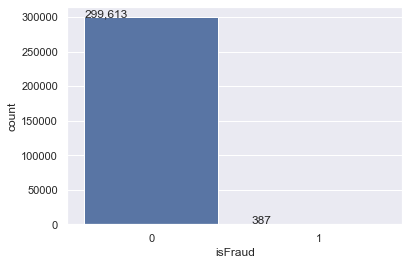

In [105]:
df_train['isFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFraud", data=df_train)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

### 2 - isFlaggedFraud

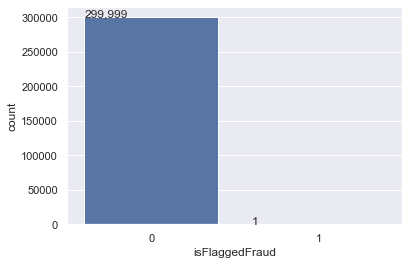

In [106]:
df_train['isFlaggedFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFlaggedFraud", data=df_train)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

### 3- type

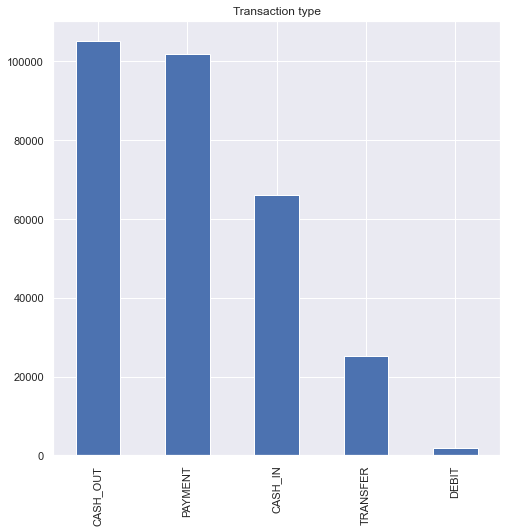

In [107]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
df_train.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.ticklabel_format(style='plain', axis='y')

In [108]:
pd.crosstab(df_train['type'], df_train['isFraud'])

isFraud,0,1
type,,
CASH_IN,65987,0
CASH_OUT,104850,192
DEBIT,1955,0
PAYMENT,101920,0
TRANSFER,24901,195


/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


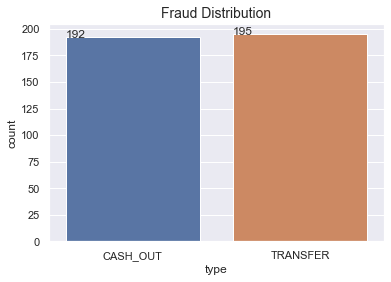

In [109]:
ax=sns.countplot('type', data=df_train[(df_train['isFraud'] == 1)])
plt.title('Fraud Distribution', fontsize=14)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

plt.show()

### 4 - step

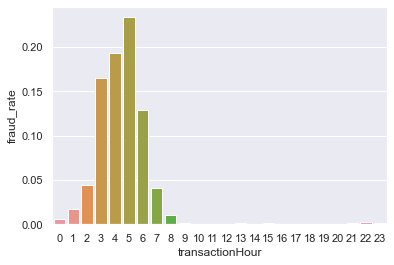

In [110]:
# transaction hour
df_train['transactionHour'] = df_train['step'] % 24

frauds_hour = pd.concat([df_train.groupby("transactionHour")["isFraud"].sum(),df_train.groupby("transactionHour")["isFraud"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
sns.barplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
plt.show()

In [111]:
# converting into object type
df_train['transactionHour'] = df_train['transactionHour'].astype('object')

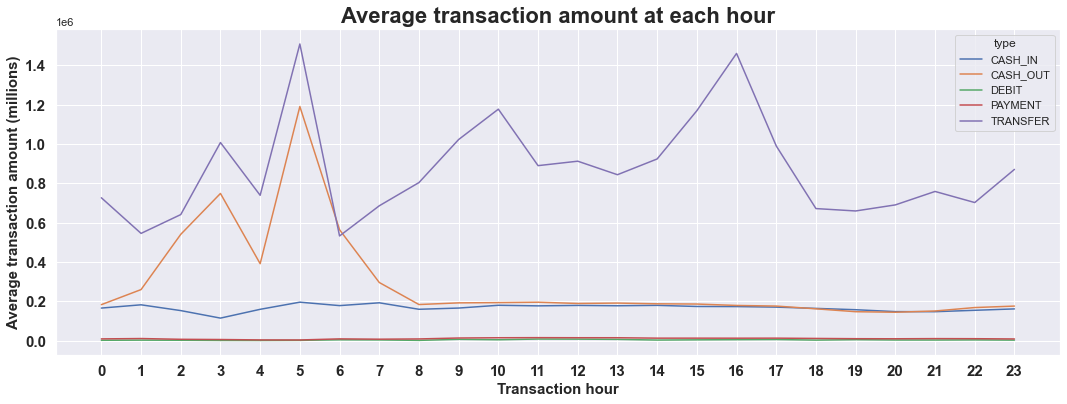

In [112]:
# avg. transaction amount at each hour for each transaction type
plt.figure(figsize=(18,6))
sns.lineplot(data=df_train.groupby(['transactionHour','type']).agg({'amount' : 'mean'}).round(2).reset_index(),
             x='transactionHour',
             y='amount',
             hue='type')
plt.xlabel('Transaction hour', fontsize=15, fontweight='bold')
plt.xticks(range(24), range(24),fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Average transaction amount (millions)', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Average transaction amount at each hour', fontsize=22, fontweight='bold')
plt.show()

--

# train 

In [113]:

# too many unique values in nameOrig, nameDest, we do some feature engineering-- assign them into C or M, customer or merchant
df_train['nameOrig_class'] = df_train['nameOrig'].apply(lambda x: x[0:1])
df_train['nameOrig_class'].value_counts()

df_train['nameDest_class'] = df_train['nameDest'].apply(lambda x: x[0:1])
df_train['nameDest_class'].value_counts()

C    198080
M    101920
Name: nameDest_class, dtype: int64

norm_amount


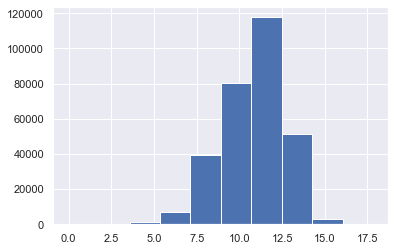

norm_isFlaggedFraud


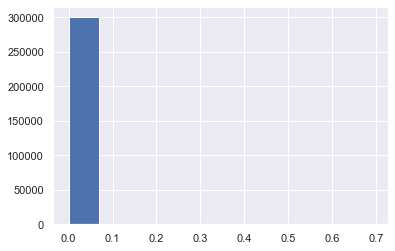

norm_newbalanceDest


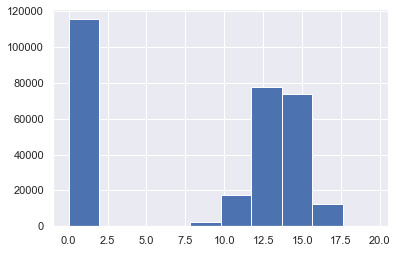

norm_oldbalanceOrg


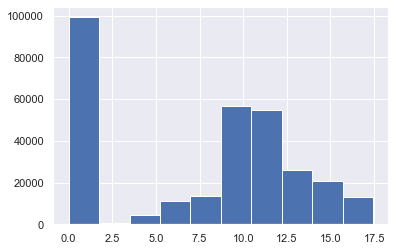

norm_step


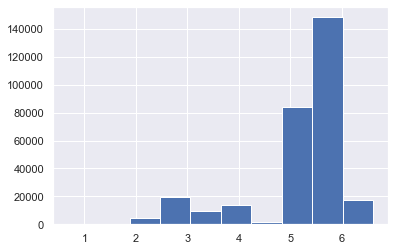

In [114]:
for i in ['amount', 'isFlaggedFraud', 'newbalanceDest', 'oldbalanceOrg', 'step']:
    print(f'norm_{i}')
    df_train[f'norm_{i}'] = np.log(df_train[f'{i}']+1)
    df_train[f'norm_{i}'].hist()
    plt.show()

In [115]:
df_train = pd.concat([df_train, pd.get_dummies(df_train[['type', 'nameOrig_class', 'nameDest_class']], prefix='type')],axis=1) 

In [116]:
df_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,norm_oldbalanceOrg,norm_step,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type_C,type_C,type_M
486548,19,PAYMENT,33688.88,C1607102420,0.0,0.00,M1498412788,0.00,0.00,0,...,0.000000,2.995732,0,0,0,1,0,1,0,1
5717510,398,CASH_OUT,425900.93,C444567143,16867.0,0.00,C845492994,149745.41,575646.34,0,...,9.733174,5.988961,0,1,0,0,0,1,1,0
1597387,156,PAYMENT,8471.67,C24524743,202415.0,193943.33,M2015857724,0.00,0.00,0,...,12.218080,5.056246,0,0,0,1,0,1,0,1
2758578,212,CASH_OUT,175655.64,C1947758025,0.0,0.00,C840858860,3393248.63,3568904.28,0,...,0.000000,5.361292,0,1,0,0,0,1,1,0
3122816,236,CASH_OUT,159605.73,C1961652135,30915.0,0.00,C1277221049,178107.79,337713.51,0,...,10.339029,5.468060,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512163,20,CASH_OUT,77482.84,C623262460,0.0,0.00,C1672395017,264467.11,341949.95,0,...,0.000000,3.044522,0,1,0,0,0,1,1,0
826498,41,PAYMENT,18616.54,C459340122,0.0,0.00,M210111217,0.00,0.00,0,...,0.000000,3.737670,0,0,0,1,0,1,0,1
679287,36,CASH_IN,68840.71,C1154779678,21719.0,90559.71,C865525056,118626.79,49786.08,0,...,9.985989,3.610918,1,0,0,0,0,1,1,0
4740194,332,PAYMENT,690.03,C1398262268,0.0,0.00,M1920254214,0.00,0.00,0,...,0.000000,5.808142,0,0,0,1,0,1,0,1


In [117]:
df_train = df_train.drop(['nameDest',"nameOrig","type",],axis=1)

In [119]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 486548 to 4214666
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   step                 300000 non-null  int64  
 1   amount               300000 non-null  float64
 2   oldbalanceOrg        300000 non-null  float64
 3   newbalanceOrig       300000 non-null  float64
 4   oldbalanceDest       300000 non-null  float64
 5   newbalanceDest       300000 non-null  float64
 6   isFraud              300000 non-null  int64  
 7   isFlaggedFraud       300000 non-null  int64  
 8   transactionHour      300000 non-null  object 
 9   nameOrig_class       300000 non-null  object 
 10  nameDest_class       300000 non-null  object 
 11  norm_amount          300000 non-null  float64
 12  norm_isFlaggedFraud  300000 non-null  float64
 13  norm_newbalanceDest  300000 non-null  float64
 14  norm_oldbalanceOrg   300000 non-null  float64
 15  norm_step  

In [26]:
#df_train = df_train.loc[(df_train.type == 'TRANSFER') | (df_train.type == 'CASH_OUT')]

In [27]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['type'], prefix='type')],axis=1) 

In [28]:
df_train = df_train.drop(['type'],axis=1)

In [29]:
df_train = df_train.drop(["isFlaggedFraud"],axis=1)

In [30]:
df_train = df_train.drop(['nameOrig',"nameDest"],axis=1)

In [31]:
y_train = df_train["isFraud"]
X_train = df_train.drop(['isFraud'],axis=1)

In [32]:
df_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transactionHour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
486548,19,33688.88,0.0,0.00,0.00,0.00,0,19,0,0,0,1,0
5717510,398,425900.93,16867.0,0.00,149745.41,575646.34,0,14,0,1,0,0,0
1597387,156,8471.67,202415.0,193943.33,0.00,0.00,0,12,0,0,0,1,0
2758578,212,175655.64,0.0,0.00,3393248.63,3568904.28,0,20,0,1,0,0,0
3122816,236,159605.73,30915.0,0.00,178107.79,337713.51,0,20,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512163,20,77482.84,0.0,0.00,264467.11,341949.95,0,20,0,1,0,0,0
826498,41,18616.54,0.0,0.00,0.00,0.00,0,17,0,0,0,1,0
679287,36,68840.71,21719.0,90559.71,118626.79,49786.08,0,12,1,0,0,0,0
4740194,332,690.03,0.0,0.00,0.00,0.00,0,20,0,0,0,1,0


In [33]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=1234)

X_train, y_train = sm.fit_sample(X_train, y_train)


In [34]:
y_train.value_counts()

1    299613
0    299613
Name: isFraud, dtype: int64

In [35]:
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,transactionHour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,19,3.368888e+04,0.000000e+00,0.00,0.000000e+00,0.000000e+00,19,0,0,0,1,0
1,398,4.259009e+05,1.686700e+04,0.00,1.497454e+05,5.756463e+05,14,0,1,0,0,0
2,156,8.471670e+03,2.024150e+05,193943.33,0.000000e+00,0.000000e+00,12,0,0,0,1,0
3,212,1.756556e+05,0.000000e+00,0.00,3.393249e+06,3.568904e+06,20,0,1,0,0,0
4,236,1.596057e+05,3.091500e+04,0.00,1.781078e+05,3.377135e+05,20,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
599221,382,4.041696e+05,4.041696e+05,0.00,0.000000e+00,0.000000e+00,4.78719,0,0,0,0,1
599222,388,2.844426e+04,2.844426e+04,0.00,3.856764e+05,4.141206e+05,4.81421,0,1,0,0,0
599223,318,9.693194e+06,9.693194e+06,0.00,5.991581e+04,9.753110e+06,16.8521,0,1,0,0,0
599224,72,1.656481e+05,1.656481e+05,0.00,1.707989e+05,3.364471e+05,21.9218,0,1,0,0,0


# Val

In [36]:
df_val = pd.concat([df_val, pd.get_dummies(df_val['type'], prefix='type')],axis=1) 
df_val = df_val.drop(['type'],axis=1)
df_val = df_val.drop(["isFlaggedFraud"],axis=1)
df_val = df_val.drop(['nameOrig',"nameDest"],axis=1)
df_val['transactionHour'] = df_val['step'] % 24

In [37]:
y_val = df_val["isFraud"]
X_val= df_val.drop(['isFraud'],axis=1)

#t

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score,accuracy_score,f1_score,classification_report,precision_recall_curve,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
from sklearn.svm import SVC

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


In [42]:
import imblearn

In [43]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 

In [44]:
rus = RandomUnderSampler(random_state=42)

In [45]:
#X_resampled, Y_resampled = rus.fit_resample(X_train, y_train)

In [46]:
# print("Resampled shape of X: ", X_resampled.shape)
# print("Resampled shape of Y: ", Y_resampled.shape)

In [47]:
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.under_sampling import RandomUnderSampler 
# rus = RandomUnderSampler(random_state=42)
# X_resampled, Y_resampled = rus.fit_resample(X_train, y_train)
# print("Resampled shape of X: ", X_resampled.shape)
# print("Resampled shape of Y: ", Y_resampled.shape)

In [48]:
# rus = RandomUnderSampler(random_state=42)
# X_resampledv, Y_resampledv = rus.fit_resample(X_val, y_val)

In [49]:
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc, precision_score

In [50]:
X_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,transactionHour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,19,3.368888e+04,0.000000e+00,0.00,0.000000e+00,0.000000e+00,19,0,0,0,1,0
1,398,4.259009e+05,1.686700e+04,0.00,1.497454e+05,5.756463e+05,14,0,1,0,0,0
2,156,8.471670e+03,2.024150e+05,193943.33,0.000000e+00,0.000000e+00,12,0,0,0,1,0
3,212,1.756556e+05,0.000000e+00,0.00,3.393249e+06,3.568904e+06,20,0,1,0,0,0
4,236,1.596057e+05,3.091500e+04,0.00,1.781078e+05,3.377135e+05,20,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
599221,382,4.041696e+05,4.041696e+05,0.00,0.000000e+00,0.000000e+00,4.78719,0,0,0,0,1
599222,388,2.844426e+04,2.844426e+04,0.00,3.856764e+05,4.141206e+05,4.81421,0,1,0,0,0
599223,318,9.693194e+06,9.693194e+06,0.00,5.991581e+04,9.753110e+06,16.8521,0,1,0,0,0
599224,72,1.656481e+05,1.656481e+05,0.00,1.707989e+05,3.364471e+05,21.9218,0,1,0,0,0


In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
KNN = KNeighborsClassifier(n_neighbors=3)

KNN.fit(X_train, y_train)

y_predict = KNN.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     99871
           1       0.12      0.88      0.21       129

    accuracy                           0.99    100000
   macro avg       0.56      0.93      0.60    100000
weighted avg       1.00      0.99      0.99    100000

[[99027   844]
 [   16   113]]


In [130]:
Logg = LogisticRegression()

Logg.fit(X_train, y_train)

y_predict = Logg.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     99871
           1       0.02      0.97      0.04       129

    accuracy                           0.94    100000
   macro avg       0.51      0.95      0.50    100000
weighted avg       1.00      0.94      0.97    100000

[[93907  5964]
 [    4   125]]


In [57]:
RF = RandomForestClassifier(random_state=1234)

RF.fit(X_train, y_train)

y_predict = RF.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     99871
           1       0.00      0.10      0.01       129

    accuracy                           0.97    100000
   macro avg       0.50      0.54      0.50    100000
weighted avg       1.00      0.97      0.98    100000

[[96841  3030]
 [  116    13]]


In [52]:
dtc = DecisionTreeClassifier(random_state=1234)

dtc.fit(X_train, y_train)

y_predict = dtc.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99871
           1       0.17      0.62      0.27       129

    accuracy                           1.00    100000
   macro avg       0.58      0.81      0.63    100000
weighted avg       1.00      1.00      1.00    100000

[[99481   390]
 [   49    80]]
